In [1]:
# Full library list and version numbers

print('This notebook was prepared using:')

import sys
print('python version %s' % sys.version)

import numpy as np
print('numpy version %s' % np.__version__)

import seaborn as sns
print('seaborn version %s' % sns.__version__)

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec
print('matplotlib version %s' % matplotlib.__version__)

import scipy
from scipy import stats
print('scipy version %s' % scipy.__version__)

import pickle
print('pickle version %s' % pickle.format_version)

import importlib

# sys.path.append('../paper-clade-reconstruction/src')
sys.path.append('./src')
import MPL as MPL
import analyze_and_plot as AP
import reconstruct_clades as RC
import infer_fitness as IF
import print_info as PI
import simulation_helper as SH
import data_parser as DP
import LTEE
import LTEE_helper as LH
import mplot as mp  # See mplot.py in the current directory
import lolipop_helper
import PALTEanalysis
import tobramycin_analysis
import figures as FIG

# GitHub directories
DATA_DIR = './data'
FIG_DIR = './figures'
LOCAL_JOBS_DIR = './data/local_jobs'
SIMULATION_DIR = './data/simulation'
SIMULATION_DIR_REL = '../simulation'

LOLIPOP_JOBS_DIR = './data/lolipop/jobs'
LOLIPOP_INPUT_DIR = './data/lolipop/input'
LOLIPOP_OUTPUT_DIR = './data/lolipop/output'
LOLIPOP_PARSED_OUTPUT_DIR = './data/lolipop/parsed_output'

CLUSTER_JOBS_DIR = './data/cluster_jobs'
LTEE_TRAJ_DIR = './data/LTEE_trajectories'
CLUSTERIZATION_OUTPUT_DIR = './data/clusterization_output'
RECONSTRUCTION_OUTPUT_DIR = './data/reconstruction_output'

LTEE_TRAJ_DIR_REL = '../LTEE_trajectories'
CLUSTERIZATION_OUTPUT_DIR_REL = '../clusterization_output'

METHODS = FIG.METHODS

This notebook was prepared using:
python version 3.6.10 |Anaconda, Inc.| (default, Mar 25 2020, 18:53:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.19.1
seaborn version 0.11.0
matplotlib version 3.3.2
scipy version 1.5.2
pickle version 4.0


In [2]:
def reload():
    importlib.reload(AP)
    importlib.reload(RC)
    importlib.reload(IF)
    importlib.reload(LH)
    importlib.reload(PI)
    importlib.reload(lolipop_helper)
    importlib.reload(FIG)
    importlib.reload(PALTEanalysis)
    importlib.reload(tobramycin_analysis)
    importlib.reload(mp)
    importlib.reload(SH)
    importlib.reload(DP)
    importlib.reload(MPL)
reload()

In [3]:
def resetPlottingParams():
    PARAMS = {'text.usetex': False, 'mathtext.fontset': 'stixsans', 'mathtext.default': 'regular', 'pdf.fonttype': 42, 'ps.fonttype': 42}
    plt.rcParams.update(matplotlib.rcParamsDefault)
    plt.rcParams.update(PARAMS)

In [4]:
resetPlottingParams()

In [5]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Dataset from Harris, K. B., Flynn, K. M. & Cooper, V. S. Polygenic Adaptation and Clonal Interference Enable Sustained Diversity in Experimental Pseudomonas aeruginosa Populations. Mol. Biol. Evol. 38, 5359–5375 (2021)

In [21]:
reload()
PALTEanalysis.load_df()
PALTEanalysis.df_traj.head(2)

,Unnamed: 0,X.1,X,X0,X17,X25,X44,X66,X75,X90,Population,Position,Mutation,Gene,Amino.Acid,Genotype
0,408,795,787,0,0.0,0.214,0.000,0.0,0.0,0.123,B2,5910265,G>C,aceE>/>aceF,Intergenic,genotype-27
1,206,794,437,0,0.0,0.000,0.109,0.0,0.0,0.109,B1,5910265,G>C,aceE>/>aceF,Intergenic,genotype-16


In [24]:
reload()
trajectories = PALTEanalysis.parse_trajectories()

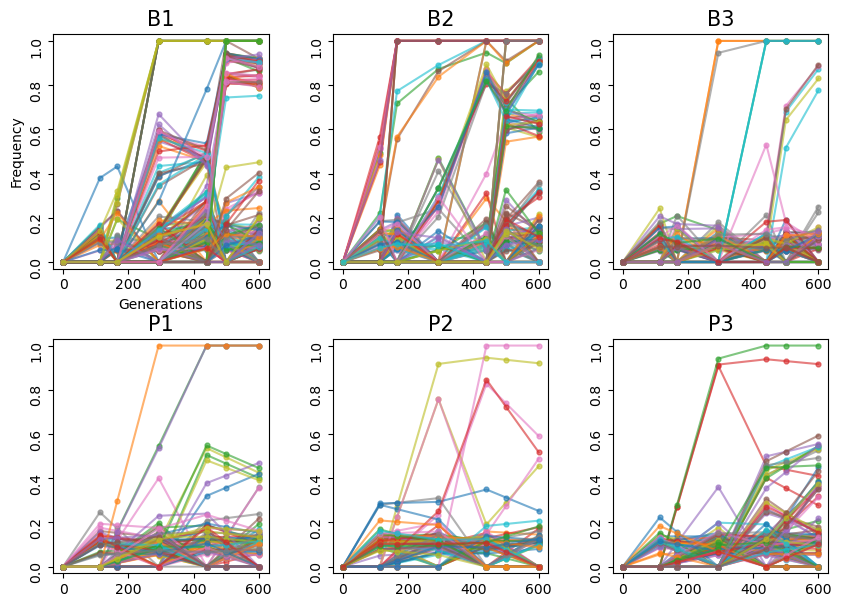

In [11]:
PALTEanalysis.plot_trajectories(trajectories, PALTEanalysis.POPULATIONS)

### Reconstcution

In [116]:
def reconstruct_for_a_PALTEanalysis_pop(pop, traj, times, plot=True, verbose=False):
    reload()
    (reconstruction, evaluation, inference) = PALTEanalysis.get_reconstruction_from_traj(traj, times, 
        mu=PALTEanalysis.MU, thFreqUnconnected=1, thFixed=0.98,
        evaluateReconstruction=True, evaluateInference=True, 
        plot=plot, verbose=verbose)
    return reconstruction, evaluation, inference


cladeFixedTimes = [3]
period boundaries:  [(0, 4), (3, 7)]
ancestors:  [0, 1, 5]
refined period boundaries:  [(0, 3), (3, 7)]


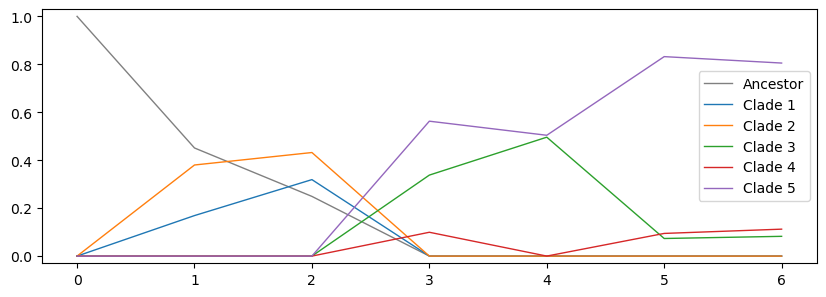

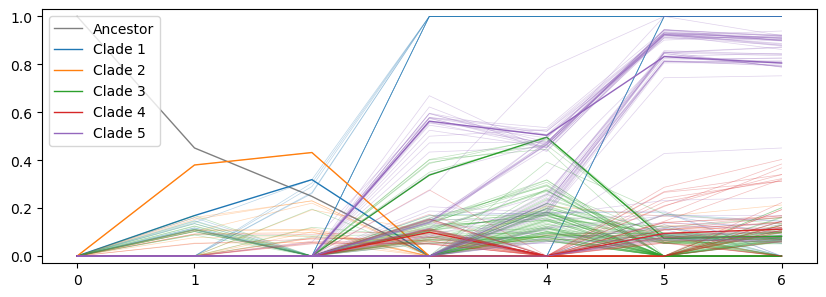

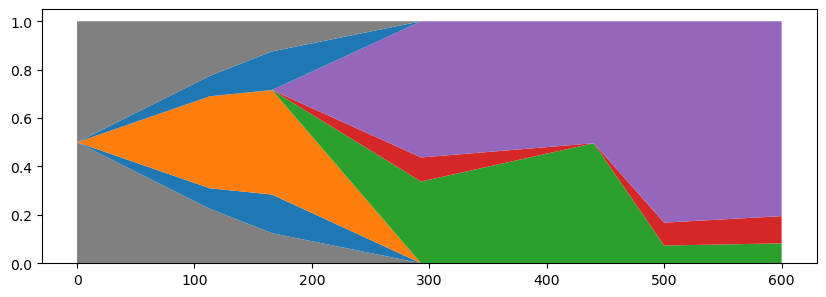

In [117]:
pop = 'B1'
reconstruction, evaluation, inference = reconstruct_for_a_PALTEanalysis_pop(pop, trajectories[pop], PALTEanalysis.TIMES)


/****************************** Pop B1 ******************************/
cladeFixedTimes = [3]
period boundaries:  [(0, 4), (3, 7)]
ancestors:  [0, 1, 5]
refined period boundaries:  [(0, 3), (3, 7)]


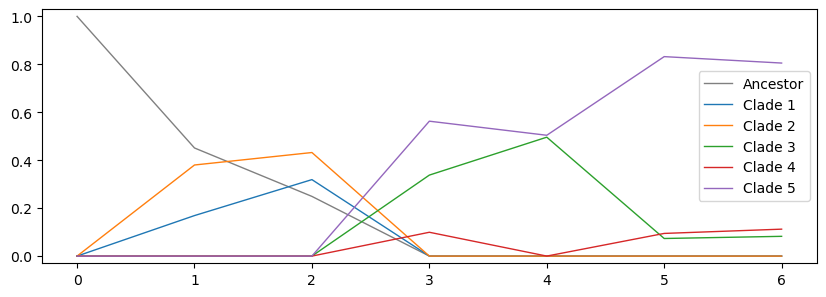

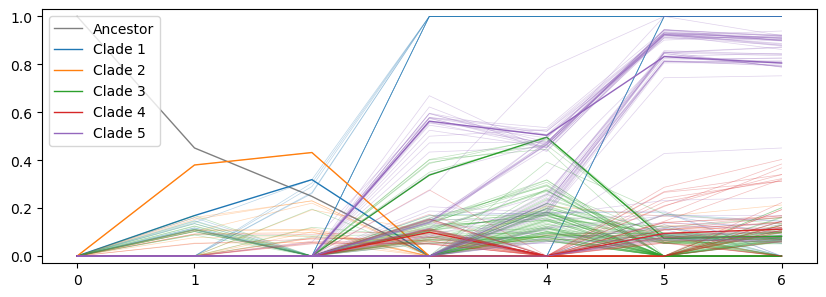

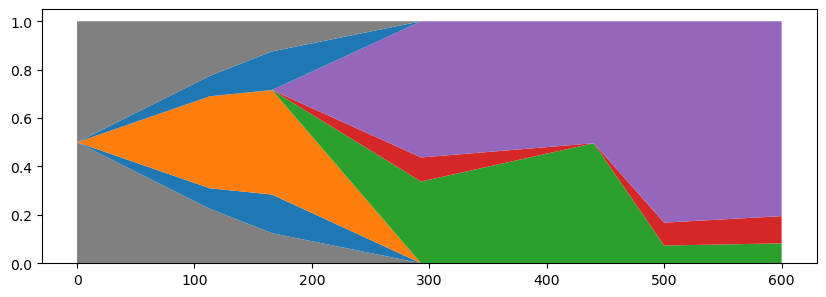

/****************************** Pop B2 ******************************/
cladeFixedTimes = [4]
period boundaries:  [(0, 5), (4, 7)]
ancestors:  [0, 1, 4]
refined period boundaries:  [(0, 3), (3, 7)]


/Users/yunxiao/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/yunxiao/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


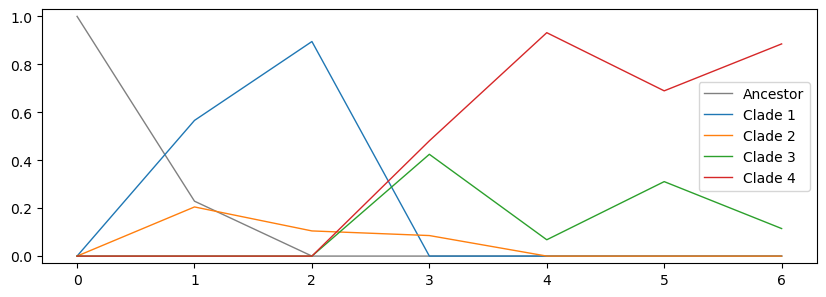

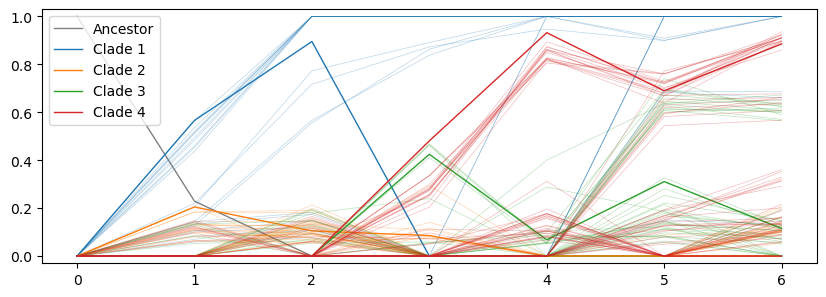

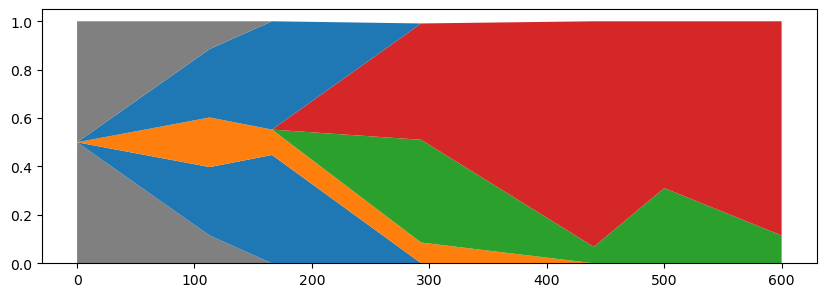

/****************************** Pop B3 ******************************/
cladeFixedTimes = [3]
period boundaries:  [(0, 4), (3, 7)]
ancestors:  [0, 1, 5]
refined period boundaries:  [(0, 1), (1, 7)]


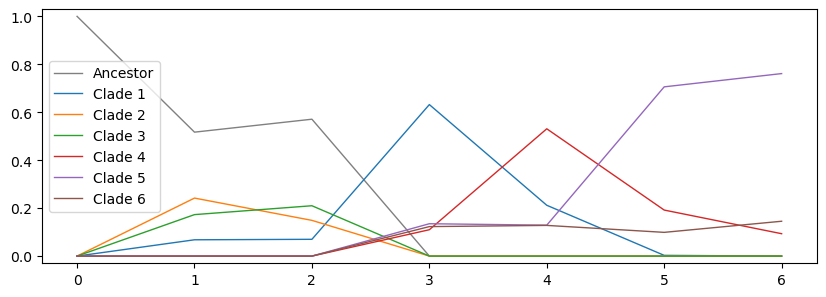

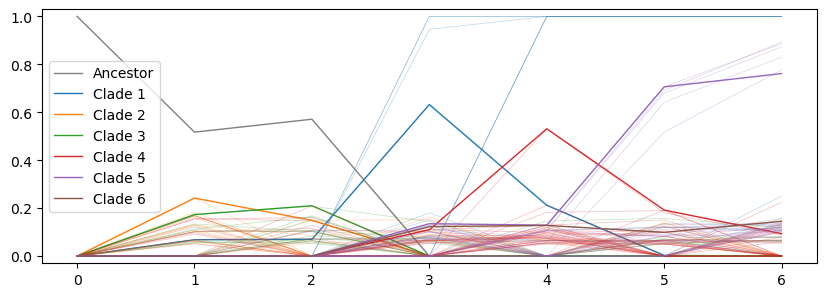

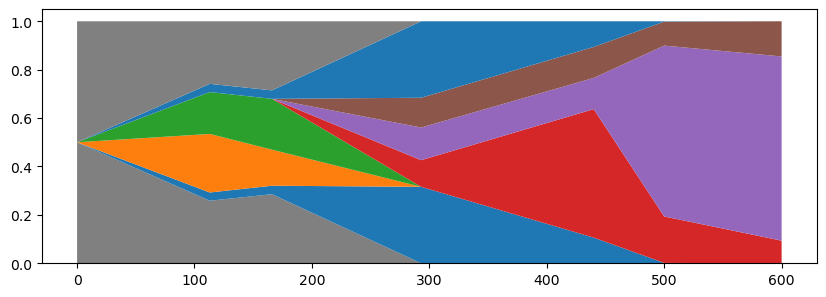

/****************************** Pop P1 ******************************/
cladeFixedTimes = [3]
period boundaries:  [(0, 4), (3, 7)]
ancestors:  [0, 1, 4]
refined period boundaries:  [(0, 2), (2, 7)]


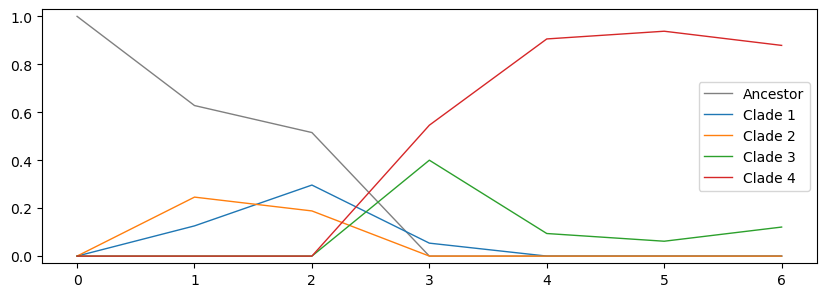

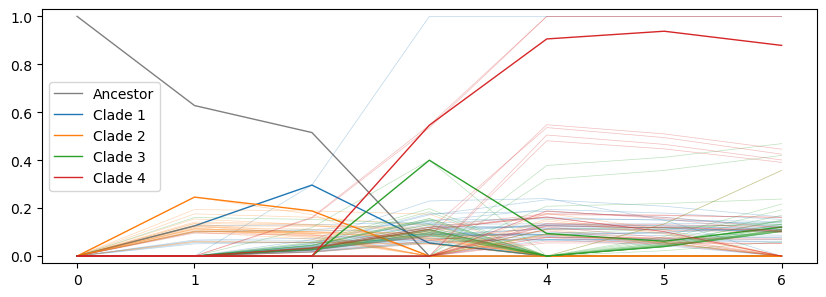

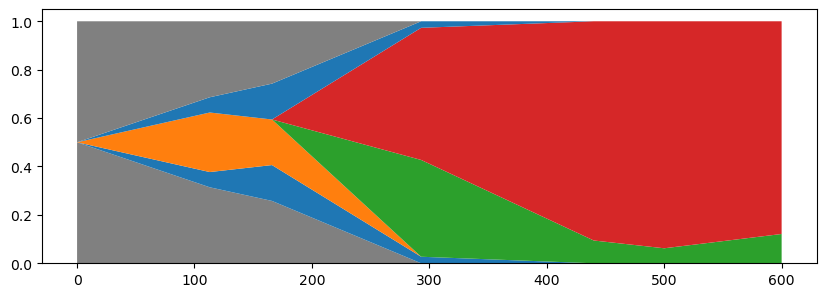

/****************************** Pop P2 ******************************/
cladeFixedTimes = [4]
period boundaries:  [(0, 5), (4, 7)]
ancestors:  [0, 2, 4]
refined period boundaries:  [(0, 2), (2, 7)]


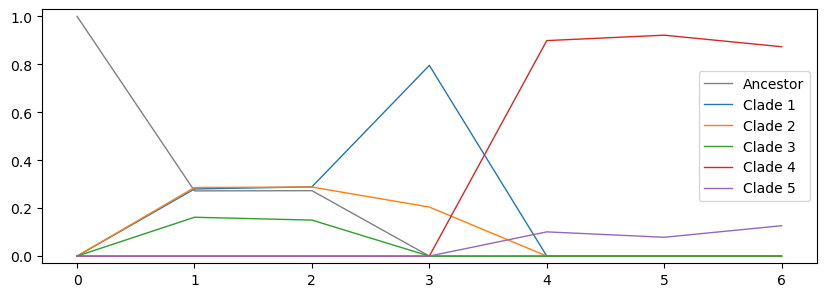

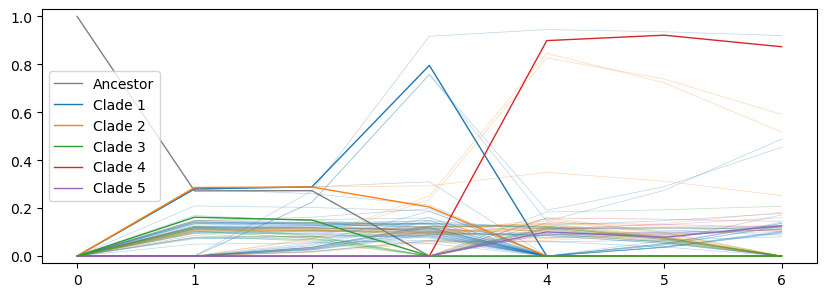

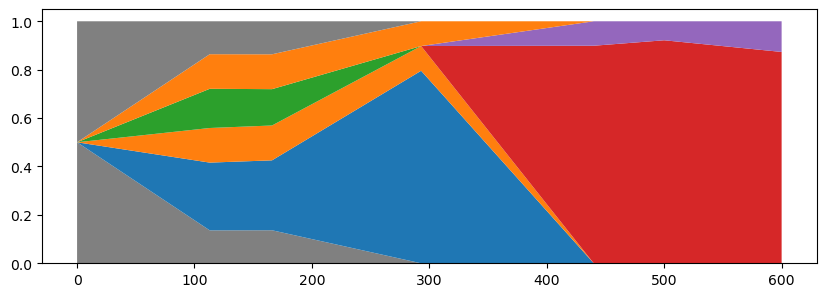

/****************************** Pop P3 ******************************/
cladeFixedTimes = [4]
period boundaries:  [(0, 5), (4, 7)]
ancestors:  [0, 1, 4]
refined period boundaries:  [(0, 1), (1, 7)]


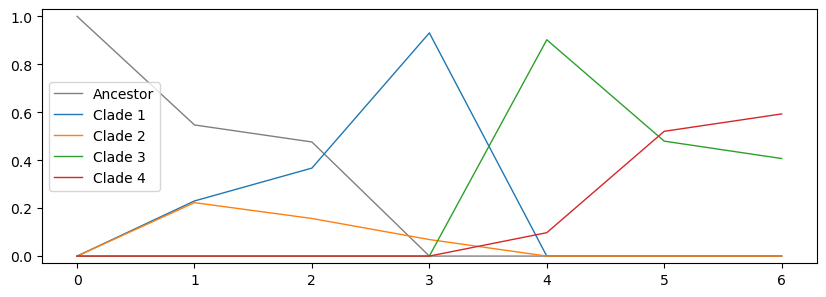

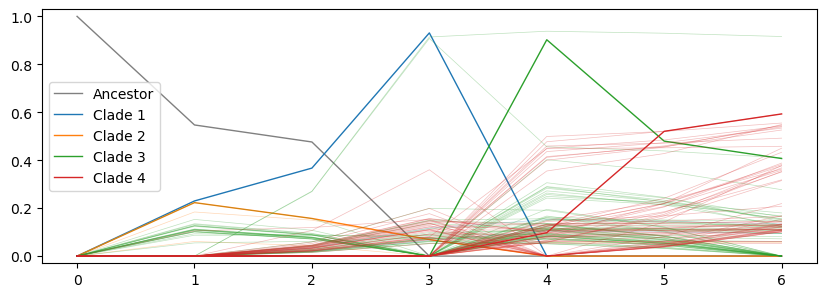

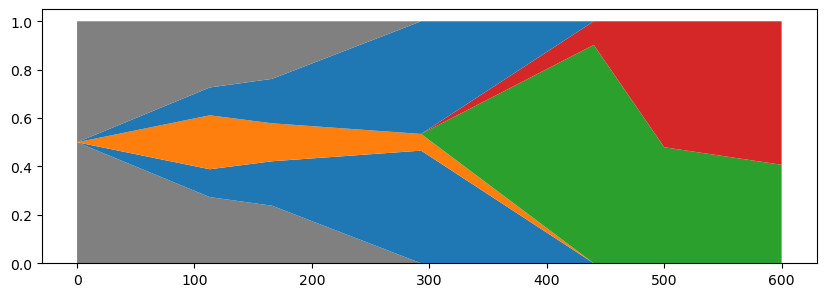

In [119]:
for pop in PALTEanalysis.POPULATIONS:
    print(f'/' + '*' * 30 + f' Pop {pop} ' + '*' * 30 + '/')
    reconstruction, evaluation, inference = reconstruct_for_a_PALTEanalysis_pop(pop, trajectories[pop], PALTEanalysis.TIMES)
    


### Lolipop (v0.9.0)

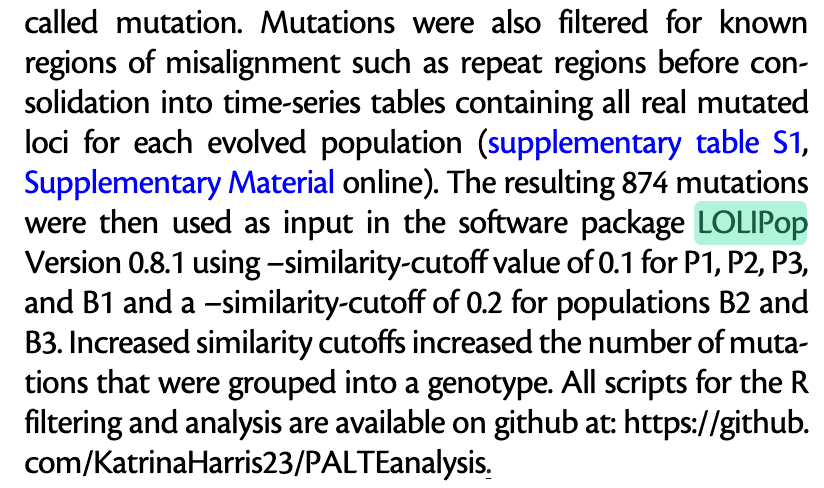

In [67]:
for pop in PALTEanalysis.POPULATIONS:
    traj = trajectories[pop]
    filename = f'{LOLIPOP_INPUT_DIR}/{pop}.tsv'
    lolipop_helper.saveTrajectoriesToTables(traj, filename, times=TIMES, sep='\t')
    

In [68]:
similarity_cutoffs = {
    'P1': 0.1,
    'P2': 0.1,
    'P3': 0.1,
    'B1': 0.1,
    'B2': 0.2,
    'B3': 0.2,
}
filename = 'lolipop_PALTEanalysis_data.sh'
with open(f'{LOLIPOP_JOBS_DIR}/{filename}', 'w') as fp:
    fp.write('#!/bin/sh\n')
    for pop in PALTEanalysis.POPULATIONS:
        similarity_cutoff = similarity_cutoffs[pop]
        fp.write(f"lolipop lineage --input {LOLIPOP_INPUT_DIR}/{pop}.tsv --output {LOLIPOP_OUTPUT_DIR}/{pop} --similarity-cutoff {similarity_cutoff}\n")


In [69]:
reload()
for pop in PALTEanalysis.POPULATIONS:
    directory = f'{LOLIPOP_OUTPUT_DIR}/{pop}'
    filename = f'{pop}'
    saveFile = f'{LOLIPOP_PARSED_OUTPUT_DIR}/{filename}'
    lolipop_helper.parseOutput(directory, filename, saveFile=saveFile)

/Users/yunxiao/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [70]:
reload()
data_PALTEanalysis = {}
for pop in PALTEanalysis.POPULATIONS:
    file = f'{LOLIPOP_PARSED_OUTPUT_DIR}/{pop}.npz'
    data_PALTEanalysis[pop] = lolipop_helper.loadParsedOutput(file)

In [71]:
titles = {}
for pop in PALTEanalysis.POPULATIONS:
    traj, genoTraj = data_PALTEanalysis[pop]['traj'], data_PALTEanalysis[pop]['genoTraj']
    numGenotypeInTheEnd = np.sum(genoTraj[-1, :] > 1e-2)
    numAlleleInTheEnd = np.sum(traj[-1, :] > 1e-2)
    titles[pop] = f'Genotypes = {numGenotypeInTheEnd}\nMutations = {numAlleleInTheEnd}'
    

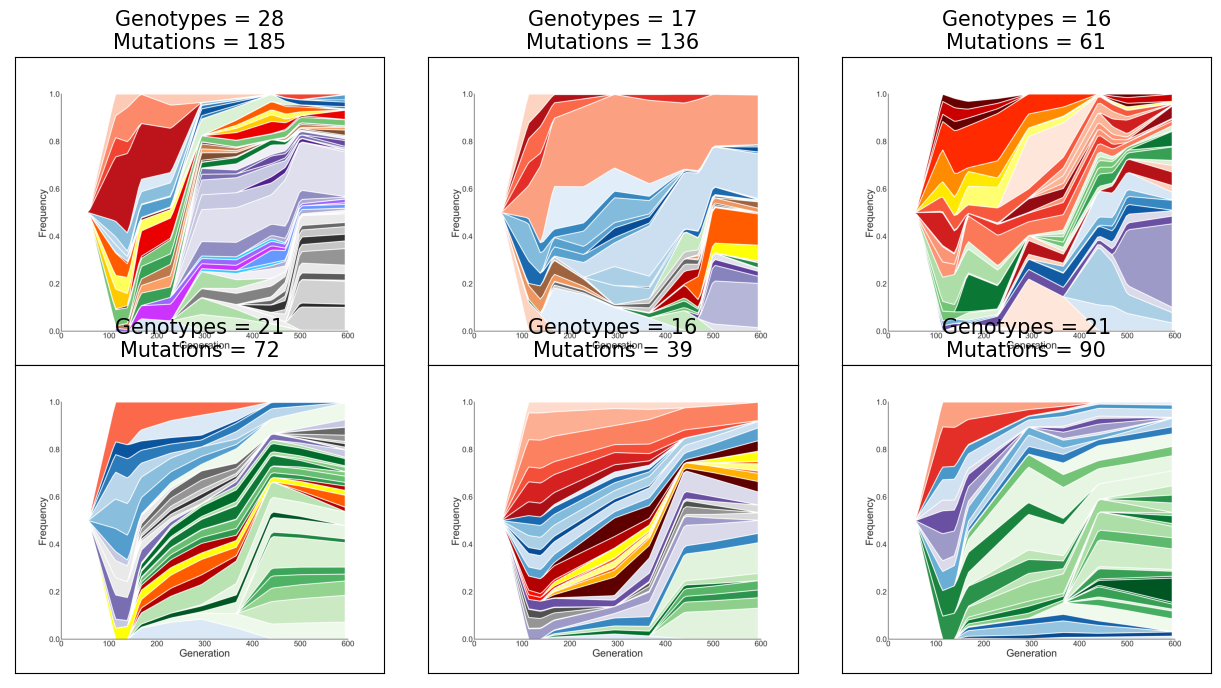

In [75]:
reload()
files = PALTEanalysis.parse_muller_files(PALTEanalysis.POPULATIONS)
PALTEanalysis.display_muller_plots(files, PALTEanalysis.POPULATIONS, titles=titles, wspace=0, hspace=0, figsize=(16, 8))


### Evoracle

In [47]:
reload()
PALTEanalysis.save_traj_for_evoracle(trajectories=trajectories)
PALTEanalysis.generate_evoracle_scripts()

In [68]:
for pop in PALTEanalysis.POPULATIONS:
    res = PALTEanalysis.load_evoracle(pop)
    print(f'pop {pop}, geno_traj: ', res['geno_traj'][0, :5])

pop B1, geno_traj:  [nan nan nan nan nan]
pop B2, geno_traj:  [nan nan nan nan nan]
pop B3, geno_traj:  [nan nan nan nan nan]
pop P1, geno_traj:  [nan nan nan nan nan]
pop P2, geno_traj:  [nan nan nan nan nan]
pop P3, geno_traj:  [nan nan nan nan nan]


#### An example: B1

In [48]:
reload()
pop = 'B1'
res = PALTEanalysis.load_evoracle(pop)

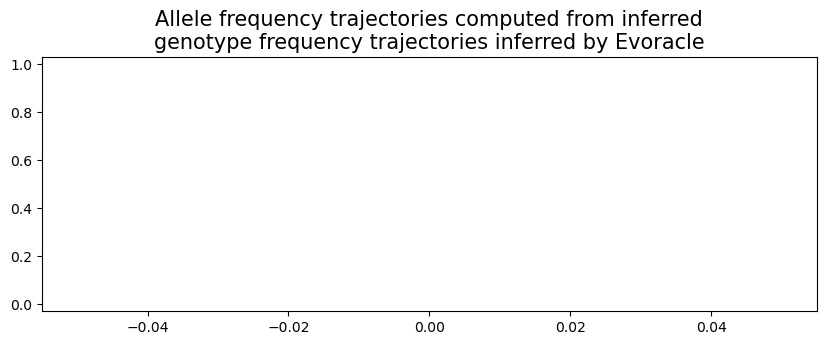

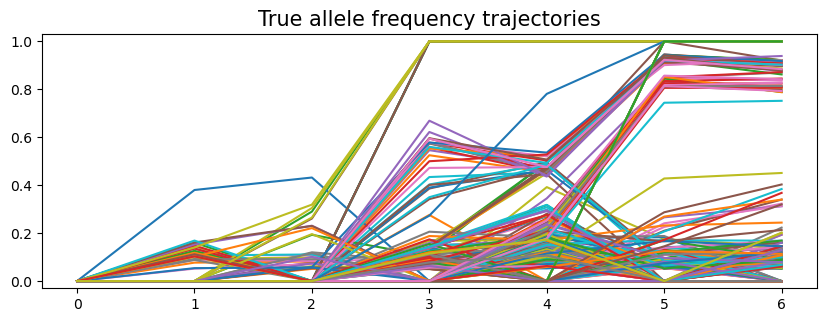

In [49]:
AP.plotTraj(res['traj_from_geno_traj'], title='Allele frequency trajectories computed from inferred\ngenotype frequency trajectories inferred by Evoracle')
AP.plotTraj(trajectories[pop], title='True allele frequency trajectories')


## Datasets from ***Scribner, M. R., Santos-Lopez, A., Marshall, C. W., Deitrick, C. & Cooper, V. S. Parallel Evolution of Tobramycin Resistance across Species and Environments. MBio 11, (2020)***

In [34]:
reload()
tobramycin_analysis.load_df_traj()
medium, rpl = tobramycin_analysis.MEDIA[0], 0
tobramycin_analysis.df_pa_allele[medium][rpl].head(2)

,Unnamed: 0,10,12,3,4,6,7,9,0,Trajectory,Gene
0,fusA1 Q678L,90.7,100.0,65.3,100.0,100.0,100,91.0,0,1,fusA1 Q678L
1,orfK coding,13.5,54.6,0.0,64.6,77.7,89,51.2,0,2,orfK coding


### Reconstcution

In [147]:
def reconstruct_for_a_tobramycin_analysis_pop(medium, rpl, traj, times, plot=True, verbose=False):
    reload()
    (reconstruction, evaluation, inference) = tobramycin_analysis.get_reconstruction_from_traj(traj, times, 
        mu=tobramycin_analysis.MU, thFreqUnconnected=1, thFixed=0.98,
        evaluateReconstruction=True, evaluateInference=True, 
        plot=plot, verbose=verbose)
    return reconstruction, evaluation, inference


No clade getting fixed. Treating the entire evolution as a whole competition period.  


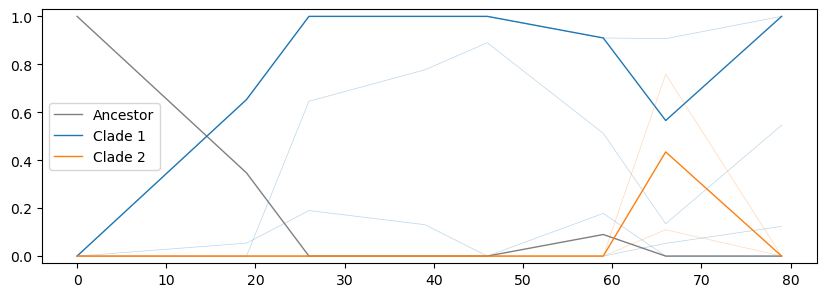

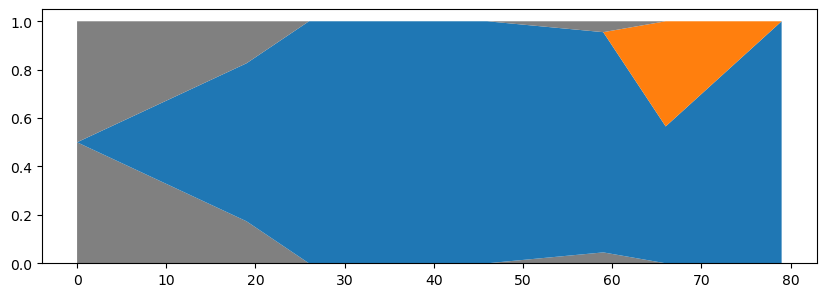

In [155]:
reload()
medium, rpl = 'Biofilm', 0
traj, times = tobramycin_analysis.traj_pa[medium][rpl][:2]
reconstruction, evaluation, inference = reconstruct_for_a_tobramycin_analysis_pop(medium, rpl, traj, times)


/****************************** Biofilm-1 ******************************/
No clade getting fixed. Treating the entire evolution as a whole competition period.  


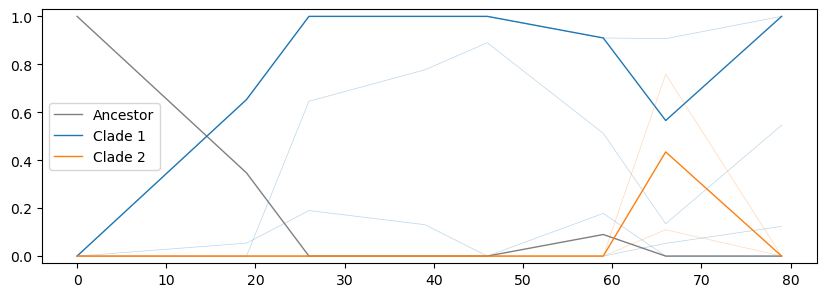

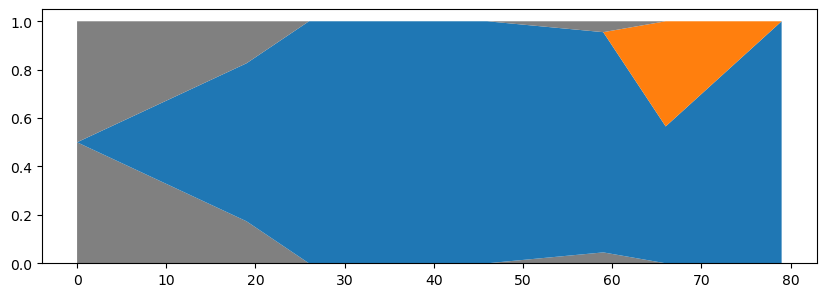

/****************************** Biofilm-2 ******************************/
No clade getting fixed. Treating the entire evolution as a whole competition period.  


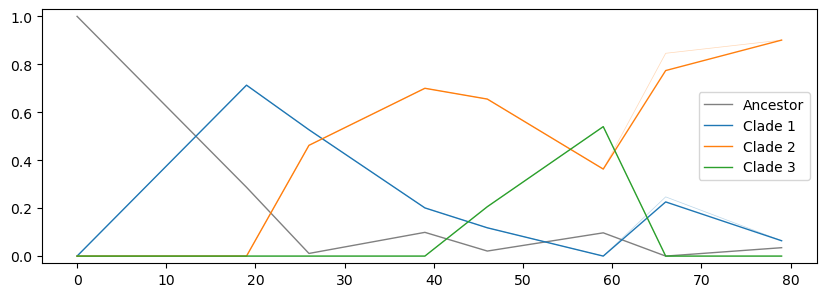

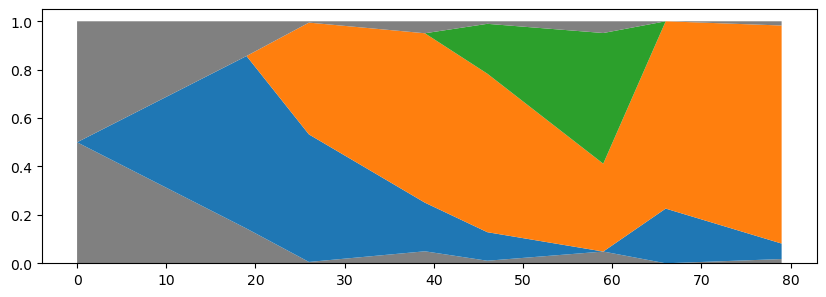

/****************************** Biofilm-3 ******************************/
No clade getting fixed. Treating the entire evolution as a whole competition period.  


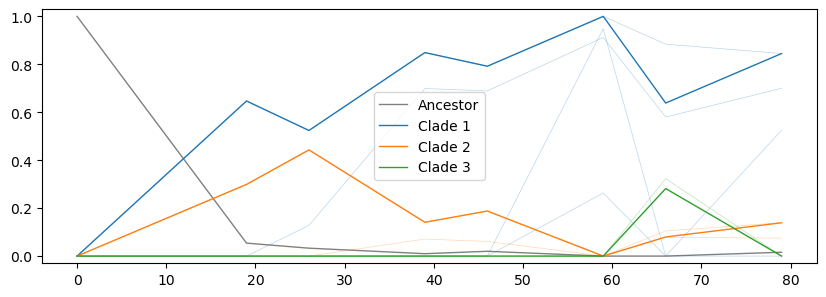

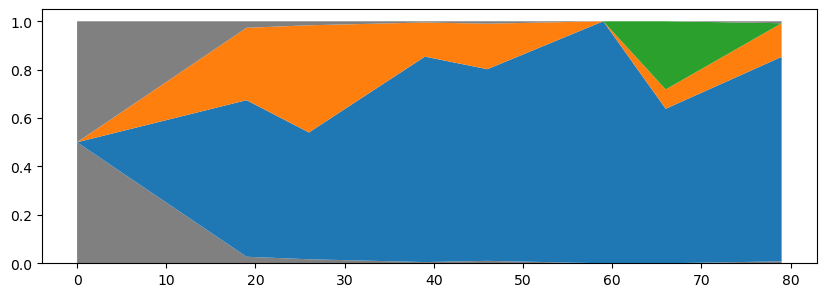

/****************************** Planktonic-1 ******************************/
No clade getting fixed. Treating the entire evolution as a whole competition period.  


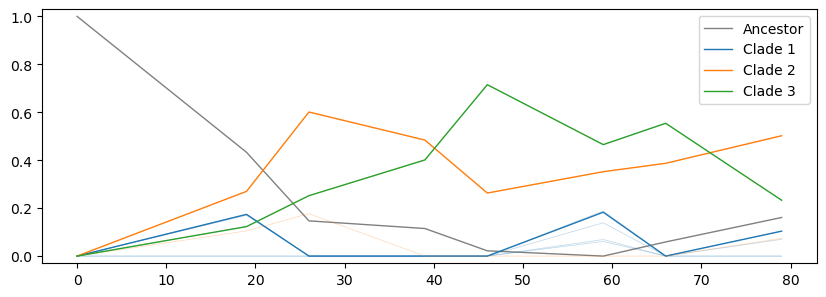

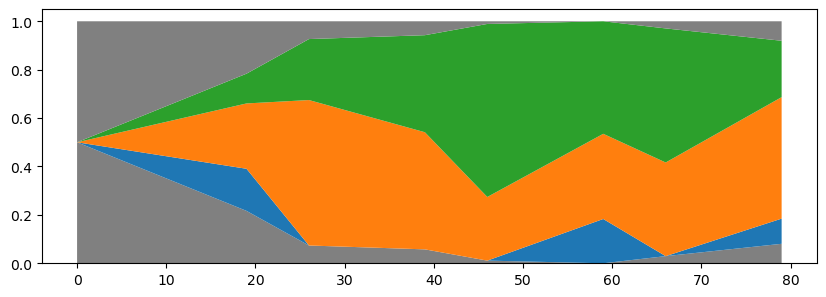

/****************************** Planktonic-2 ******************************/
No clade getting fixed. Treating the entire evolution as a whole competition period.  


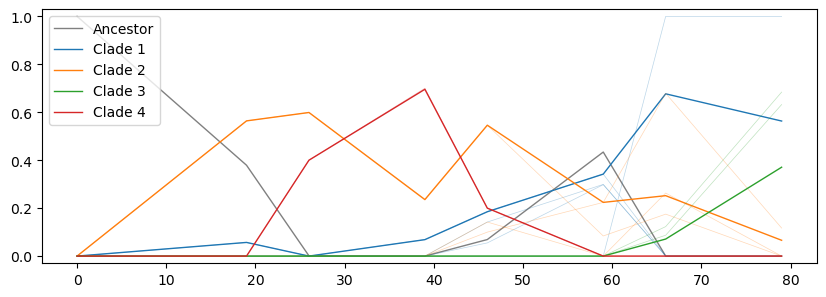

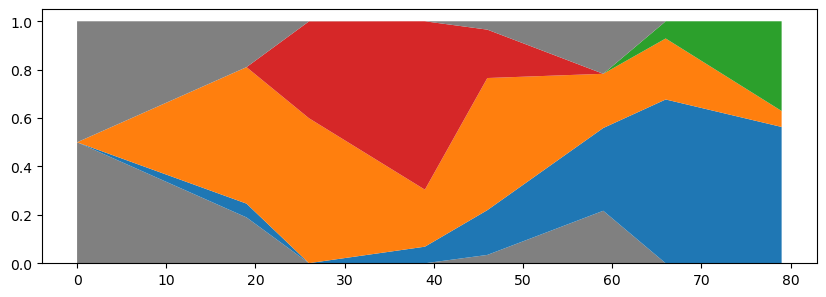

/****************************** Planktonic-3 ******************************/
No clade getting fixed. Treating the entire evolution as a whole competition period.  


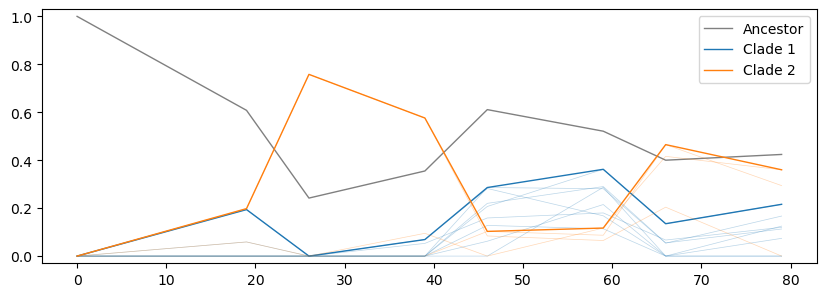

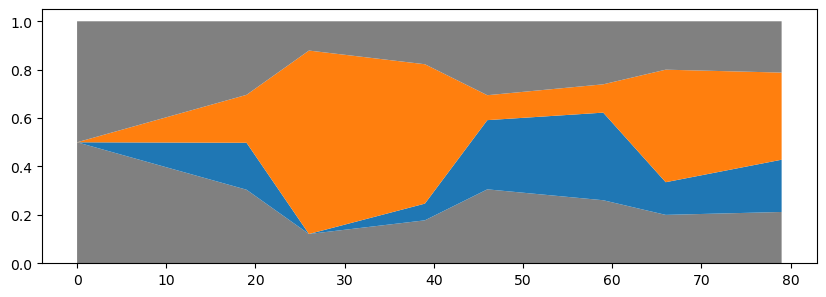

In [157]:
reload()
for medium in tobramycin_analysis.MEDIA:
    for rpl in range(tobramycin_analysis.NUM_REPLICATES):
        print(f'/' + '*' * 30 + f' {medium}-{rpl+1} ' + '*' * 30 + '/')
        traj, times = tobramycin_analysis.traj_pa[medium][rpl][:2]
        reconstruction, evaluation, inference = reconstruct_for_a_tobramycin_analysis_pop(medium, rpl, traj, times)


### Lolipop (v0.9.0)

In [128]:
# Create .sh job file
filename = 'lolipop_tobramycin_analysis_data.sh'
with open(f'{LOLIPOP_JOBS_DIR}/{filename}', 'w') as fp:
    fp.write('#!/bin/sh\n')
    for medium in tobramycin_analysis.MEDIA:
        for rpl in range(tobramycin_analysis.NUM_REPLICATES):
            fp.write(f"lolipop lineage --input {LOLIPOP_INPUT_DIR}/{medium}_{rpl+1}_mullerinput.csv --output {LOLIPOP_OUTPUT_DIR}/pa_{medium.lower()}_{rpl+1}\n")


In [129]:
reload()
for medium in tobramycin_analysis.MEDIA:
    for rpl in range(tobramycin_analysis.NUM_REPLICATES):
        directory = f'{LOLIPOP_OUTPUT_DIR}/pa_{medium.lower()}_{rpl+1}'
        filename = f'{medium}_{rpl+1}_mullerinput'
        saveFile = f'{LOLIPOP_PARSED_OUTPUT_DIR}/{filename}'
        lolipop_helper.parseOutput(directory, filename, saveFile=saveFile)

/Users/yunxiao/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [146]:
reload()
data_tobramycin_analysis = {medium: [None for rpl in range(tobramycin_analysis.NUM_REPLICATES)] 
                            for medium in tobramycin_analysis.MEDIA}
for medium in tobramycin_analysis.MEDIA:
    for rpl in range(tobramycin_analysis.NUM_REPLICATES):
        file = f'{LOLIPOP_PARSED_OUTPUT_DIR}/{medium}_{rpl+1}_mullerinput.npz'
        data_tobramycin_analysis[medium][rpl] = lolipop_helper.loadParsedOutput(file)
        

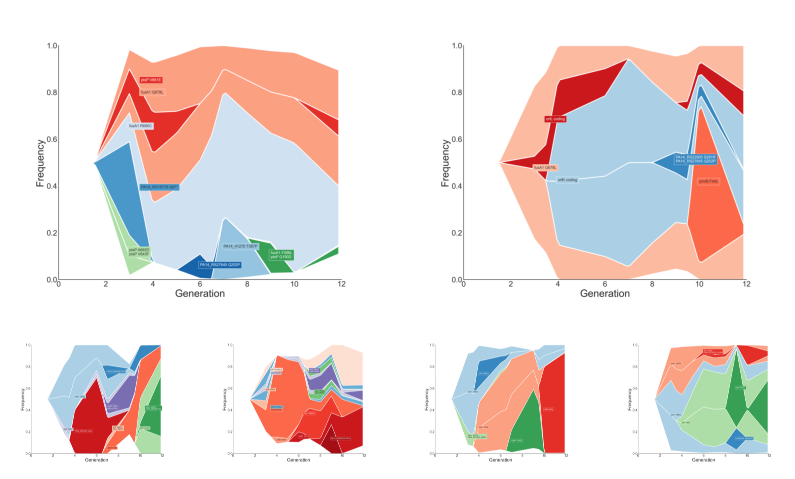

In [145]:
reload()
files = tobramycin_analysis.parse_muller_files()
tobramycin_analysis.display_muller_plots(files)


In [156]:
def inferForLolipop(muForInference=1e-6, regularization=1):
    intCov_lolipop, selection_lolipop, fitness_lolipop = {medium: [] for medium in media}, {medium: [] for medium in media}, {medium: [] for medium in media}
    for medium in media:
        for rpl in range(num_replicates):
            filename = f'{medium}_{rpl+1}_mullerinput'
            file = f'{parsed_output_dir}/{filename}.npz'
            data = lolipop_helper.loadParsedOutput(file)
            intCov, selection, fitness = lolipop_helper.inferencePipeline(data, mu=muForInference, regularization=regularization)

            intCov_lolipop[medium].append(intCov)
            selection_lolipop[medium].append(selection)
            fitness_lolipop[medium].append(fitness)
    return intCov_lolipop, selection_lolipop, fitness_lolipop


In [157]:
reload()
intCov_lolipop, selection_lolipop, fitness_lolipop = inferForLolipop(muForInference=1e-6, regularization=1)

### Evoracle

`mkdir Biofilm-0 Biofilm-1 Biofilm-2 Planktonic-0 Planktonic-1 Planktonic-2`

In [54]:
reload()
tobramycin_analysis.save_traj_for_evoracle()
tobramycin_analysis.generate_evoracle_scripts()

In [67]:
for medium in tobramycin_analysis.MEDIA:
    for rpl in range(tobramycin_analysis.NUM_REPLICATES):
        res = tobramycin_analysis.load_evoracle(medium, rpl)
        print(f'{medium}-{rpl+1}, geno_traj: ', res['geno_traj'][0, :5])

Biofilm-1, geno_traj:  [9.9909940e-01 6.3896355e-06 4.5358913e-05 4.0354850e-06 4.8740156e-05]
Biofilm-2, geno_traj:  [9.9812540e-01 9.2985480e-05 1.2458129e-07 8.8033730e-06 1.9658842e-07]
Biofilm-3, geno_traj:  [9.9882740e-01 2.3796489e-05 1.8682942e-05 7.1916315e-06 3.9988063e-07]
Planktonic-1, geno_traj:  [9.9944955e-01 2.9384233e-07 2.5969448e-06 6.2854900e-08 8.9984803e-07]
Planktonic-2, geno_traj:  [9.98648460e-01 1.43502375e-05 2.23062220e-07 1.45075870e-05
 2.42292160e-06]
Planktonic-3, geno_traj:  [9.9137220e-01 8.6761010e-07 4.1647962e-07 2.2745102e-03 1.5630339e-07]


#### An example: Planktonic-2

In [58]:
reload()
medium = 'Planktonic'
rpl = 1
res = tobramycin_analysis.load_evoracle(medium, rpl)

In [65]:
print(list(res.keys()))

['traj', 'genotypes', 'traj_from_geno_traj', 'int_cov', 'selection', 'selection_from_geno_traj', 'geno_traj']


(8, 12) (8, 12)


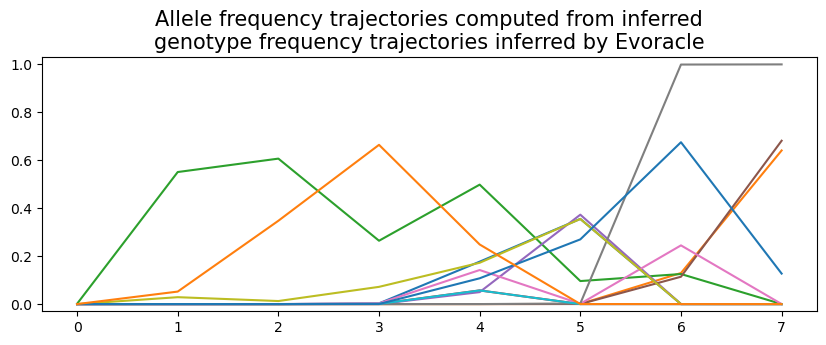

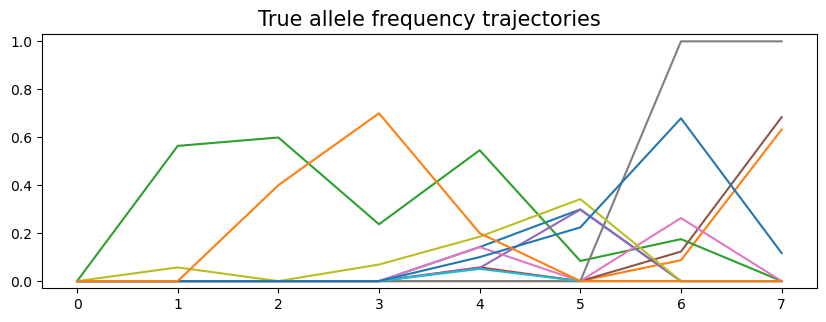

In [61]:
true_traj = tobramycin_analysis.traj_pa[medium][rpl][0]
print(res['traj_from_geno_traj'].shape, true_traj.shape)
AP.plotTraj(res['traj_from_geno_traj'], title='Allele frequency trajectories computed from inferred\ngenotype frequency trajectories inferred by Evoracle')
AP.plotTraj(true_traj, title='True allele frequency trajectories')
